# Your First Neural Network

🎯 Goals of this challenge:
- Writing the architecture of a Neural Network
- Inspect some of the most important hyperparameters of a Neural Network

In [ ]:
from sklearn.datasets import make_moons
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
%matplotlib inline

## (1)  Generating the Moons dataset

📚 Here, we will use the Scikit-Learn `make_moons` function [(see documentation here)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) to create 2 moons that cannot be linearly separated. 

👉 Each moon corresponds to a class.

In [1]:
### Generating the moons dataset
X, y = make_moons(n_samples=300, noise=0.25, random_state=0)

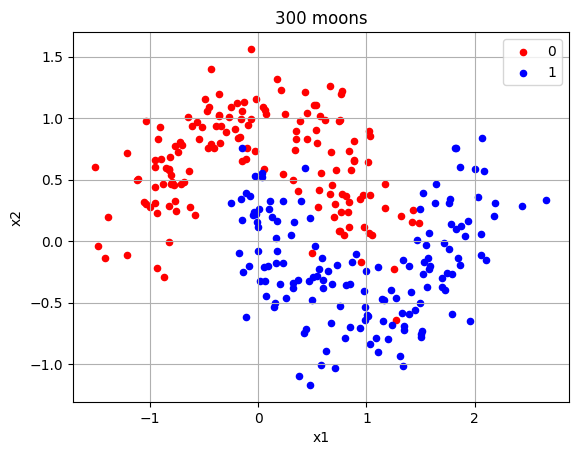

In [2]:
### This function allows to plot the two moons
def plot_moons(X, y):
    df = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1], label=y))
    colors = {0:'red', 1:'blue'}
    fig, ax = plt.subplots()
    grouped = df.groupby('label')

    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color=colors[key])       
    
    plt.title(f"{len(X)} moons")
    plt.grid(True)
    plt.show()

plot_moons(X, y)

❓  Play with the number of samples and the noise to discover the effects on the `moons dataset` ❓

🎨 Plot the moons for different values.

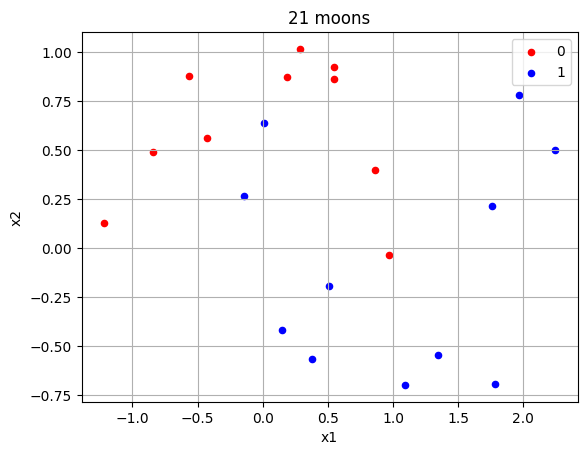

In [3]:
X, y = make_moons(n_samples=21, noise=0.2,random_state=0)
plot_moons(X, y)

❓ Create 250 samples of the data with ❓
* a noise equal to 0.20
* a random state equal to 0 to get the same results every time you re-run the notebook
* and split the initial dataset into a train and test set (size: 70/30%) 

*Remark* : Please call the variables `X_train`, `y_train`, `X_test` and `y_test`

In [4]:
X, y = make_moons(n_samples=250, noise=0.2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape

(175, 2)

## (2) Designing a basic Neural Network  for a binary classification task

🧠 You will now define your first neural network.
The architecture of your model should have: 
- a first layer with:
    - 5 neurons
    - a _relu_ activation function 
    - the correct input dimension
- an output layer suited to your binary classification task.


❓ Complete the next function with the previous architecture ❓

In [6]:
def initialize_model():
    
    model = models.Sequential()
    model.add(layers.Dense(5, activation="relu", input_dim=2))
    model.add(layers.Dense(1, activation="sigmoid"))
    model.compile(
        loss='binary_crossentropy', # We've already mentioned this loss function in Logistic Regression
        optimizer='adam', # Optimizer in Deep Learning = solver in Machine Learning | Adam = our best friend
        metrics=['accuracy']
    )
    return model

model = initialize_model()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 15        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21 (84.00 Byte)
Trainable params: 21 (84.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 15        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21 (84.00 Byte)
Trainable params: 21 (84.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## (3) Training your Neural Network

❓You are now ready to train your algorithm. 

Let's go! Initialize your model and fit it on the training set using `100 epochs`! 

Store the results of the training into a `history` variable. ❓

In [8]:
history = model.fit(X_train, y_train, batch_size=16, epochs=100)
history

Epoch 1/100


11/11 [==============================] - 2s 4ms/step - loss: 0.7495 - accuracy: 0.4686
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 0.7364 - accuracy: 0.4743
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 0.7231 - accuracy: 0.4686
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 0.7112 - accuracy: 0.4629
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6983 - accuracy: 0.4457
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6874 - accuracy: 0.4229
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6758 - accuracy: 0.4400
Epoch 8/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6654 - accuracy: 0.4857
Epoch 9/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6548 - accuracy: 0.5486
Epoch 10/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6450 - accuracy: 0.5829
Epoch 1

👀 `history` contains information about the training.

❓ Inspect all its attributes using `history.__dict__`. You will notice that you have access to epoch-by-epoch information stored in `history.history`

In [9]:
history.__dict__["history"]["loss"]

[0.7495299577713013,
 0.7363723516464233,
 0.7230774164199829,
 0.7111724019050598,
 0.6983252167701721,
 0.687360405921936,
 0.6758455634117126,
 0.6653677225112915,
 0.6547909379005432,
 0.6450000405311584,
 0.6348879337310791,
 0.6258944869041443,
 0.6163536906242371,
 0.6077404022216797,
 0.5992003679275513,
 0.5907185673713684,
 0.5827429890632629,
 0.5748847126960754,
 0.5673624873161316,
 0.5597529411315918,
 0.5529078245162964,
 0.5459686517715454,
 0.538842499256134,
 0.5319793224334717,
 0.525623619556427,
 0.5194448232650757,
 0.5130795836448669,
 0.5073113441467285,
 0.5016531348228455,
 0.4960838556289673,
 0.49028119444847107,
 0.4851738214492798,
 0.47999057173728943,
 0.4750504493713379,
 0.470267117023468,
 0.46559569239616394,
 0.46110767126083374,
 0.4566067159175873,
 0.4522700607776642,
 0.4481050670146942,
 0.4440755248069763,
 0.4400673508644104,
 0.43633654713630676,
 0.43258824944496155,
 0.4290665090084076,
 0.425597608089447,
 0.42210519313812256,
 0.41863581

❓ Plot the history of the train loss using the following function ❓

In [10]:
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.title('Train loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.grid(True)
    plt.show()

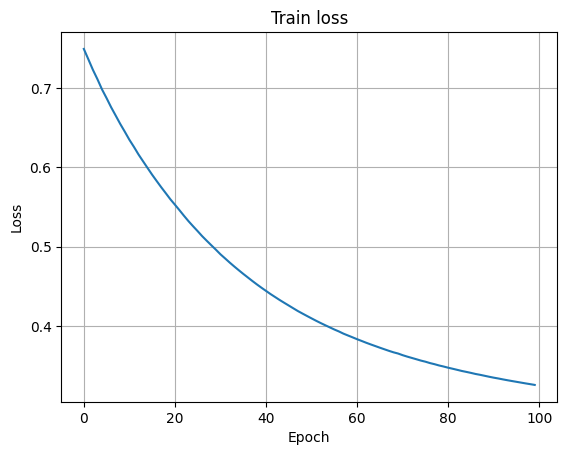

In [11]:
plot_history(history)

## (4) Predict & Evaluate performance on test set

❓ Predict the classes of the elements in the training set using _.predict()_ and store these predicted classes into a variable called `y_pred` ❓

In [12]:
y_pred = model.predict(X_test)
y_pred

3/3 [==============================] - 0s 3ms/step


array([[0.8520294 ],
       [0.7656902 ],
       [0.27193114],
       [0.08447606],
       [0.9340242 ],
       [0.79422474],
       [0.6640202 ],
       [0.333456  ],
       [0.9642893 ],
       [0.3689308 ],
       [0.9406836 ],
       [0.9264395 ],
       [0.94265884],
       [0.5614123 ],
       [0.49459553],
       [0.33003667],
       [0.9626355 ],
       [0.5090023 ],
       [0.36842763],
       [0.21279484],
       [0.04289821],
       [0.06220623],
       [0.06823099],
       [0.9143729 ],
       [0.04835676],
       [0.80395687],
       [0.05034932],
       [0.13655585],
       [0.51854706],
       [0.7818201 ],
       [0.7037586 ],
       [0.7332077 ],
       [0.5620626 ],
       [0.16094424],
       [0.9389131 ],
       [0.18756436],
       [0.8261354 ],
       [0.7576931 ],
       [0.9019137 ],
       [0.8108533 ],
       [0.942775  ],
       [0.1424951 ],
       [0.10237121],
       [0.07091796],
       [0.67382133],
       [0.3116428 ],
       [0.0836892 ],
       [0.063

❓ What are your _loss_ and your _accuracy_ on the test set ❓ 

In [13]:
result = model.evaluate((X_train), y_train)
result

6/6 [==============================] - 0s 4ms/step - loss: 0.3249 - accuracy: 0.8400


[0.3248521685600281, 0.8399999737739563]

In [14]:
accuracy = result[1]
accuracy

0.8399999737739563

## (5) Training your Neural Network with more epochs

## (6) A Deeper Deep Learning Model

❓ Let's try a **deeper** architecture that includes the following layers:

- a first layer with 20 neurons (activation: `"relu"`)
- a second layer with 10 neurons (activation: `"relu"`)
- a third layer with 5 neurons (activation: `"relu"`)
- an output layer suitable for this problem ❓


In [17]:
def initialize_model_2():
    
    model = models.Sequential()
    model.add(layers.Dense(20, activation='relu', input_dim=2))  # Replace 'input_shape' with the shape of your input data
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(5, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        loss='binary_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )
    return model
model_2 = initialize_model_2()

❓ What is the number of parameters of your new model ❓

In [18]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20)                60        
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 5)                 55        
                                                                 
 dense_6 (Dense)             (None, 1)                 6         
                                                                 
Total params: 331 (1.29 KB)
Trainable params: 331 (1.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


❓ Run your model on the previous dataset for 500 epochs and plot the loss afterwards ❓

In [19]:
history_2 = model_2.fit(X_train, y_train, batch_size=16, epochs=500)
history_2

Epoch 1/500
11/11 [==============================] - 2s 4ms/step - loss: 0.6941 - accuracy: 0.5771
Epoch 2/500
11/11 [==============================] - 0s 3ms/step - loss: 0.6874 - accuracy: 0.7371
Epoch 3/500
11/11 [==============================] - 0s 3ms/step - loss: 0.6813 - accuracy: 0.8000
Epoch 4/500
11/11 [==============================] - 0s 3ms/step - loss: 0.6746 - accuracy: 0.8114
Epoch 5/500
11/11 [==============================] - 0s 3ms/step - loss: 0.6658 - accuracy: 0.8743
Epoch 6/500
11/11 [==============================] - 0s 3ms/step - loss: 0.6559 - accuracy: 0.8743
Epoch 7/500
11/11 [==============================] - 0s 3ms/step - loss: 0.6434 - accuracy: 0.8629
Epoch 8/500
11/11 [==============================] - 0s 3ms/step - loss: 0.6278 - accuracy: 0.8686
Epoch 9/500
11/11 [==============================] - 0s 3ms/step - loss: 0.6082 - accuracy: 0.8629
Epoch 10/500
11/11 [==============================] - 0s 3ms/step - loss: 0.5846 - accuracy: 0.8629
Epoch 11/

11/11 [==============================] - 0s 3ms/step - loss: 0.1928 - accuracy: 0.9257
Epoch 489/500
11/11 [==============================] - 0s 2ms/step - loss: 0.1927 - accuracy: 0.9257
Epoch 490/500
11/11 [==============================] - 0s 2ms/step - loss: 0.1924 - accuracy: 0.9257
Epoch 491/500
11/11 [==============================] - 0s 9ms/step - loss: 0.1921 - accuracy: 0.9257
Epoch 492/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1920 - accuracy: 0.9257
Epoch 493/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1920 - accuracy: 0.9257
Epoch 494/500
11/11 [==============================] - 0s 2ms/step - loss: 0.1918 - accuracy: 0.9257
Epoch 495/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1914 - accuracy: 0.9257
Epoch 496/500
11/11 [==============================] - 0s 12ms/step - loss: 0.1913 - accuracy: 0.9257
Epoch 497/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1913 - accuracy: 0.9257
Epo

❓ What is your accuracy on the test test ? Store it as `accuracy_deep` variable (`float`) ❓

In [20]:
result_2 = model_2.evaluate((X_train), y_train)
result_2
accuracy_deep = result_2[1]

6/6 [==============================] - 0s 3ms/step - loss: 0.0202 - accuracy: 0.9943
